In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

import matplotlib.pyplot as plt ##for plots
from sklearn.model_selection import train_test_split ##for spliting data
from sklearn import datasets, linear_model, metrics ##for linear regression model
import statsmodels.api as sm ##for ols
df = pd.read_csv(r'C:\Users\hp\Downloads\understat_per_game.csv')

In [2]:
df.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.57012,1.198420,2.57012,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014,a,1.50328,1.307950,1.50328,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014,h,1.22987,0.310166,1.22987,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,a,1.03519,0.203118,1.03519,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014,h,3.48286,0.402844,3.48286,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713


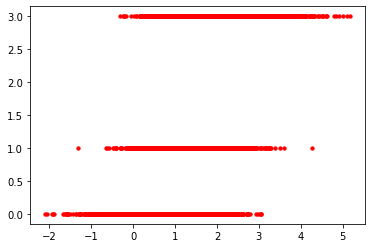

In [3]:
features = ['xG', 'xGA'] ##Create list of all independent variables from your data set
X = df.loc[:, features] ### Sub-data consisting all X variables
X = sm.add_constant(X)
y = df.loc[:, ['pts']]##Dependent variable
X_train, X_test, y_train, y_test = train_test_split (X, y)
train_size = 0.8  ##Spliting data into training and testing
reg = linear_model.LinearRegression() ##Runing a regression model using using linear_model package  
# train the model using the training sets
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_train)
# Print out the summary statistics
model.summary()
plt.scatter(model.predict(X_train), y_train, color = "red", s = 11, label = 'Scatter Plot')

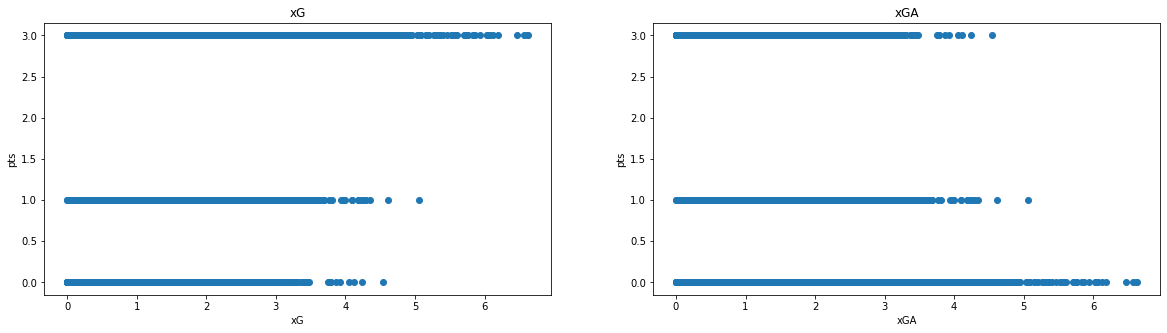

In [4]:
plt.figure(figsize=(20, 5))

features = ['xG', 'xGA']
target = df['pts']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('pts')

In [5]:
X = pd.DataFrame(np.c_[df['xG'], df['xGA']], columns = ['xG','xGA'])
Y = df['pts']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

from sklearn.metrics import r2_score 
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(19664, 2)
(4916, 2)
(19664,)
(4916,)
The model performance for training set
--------------------------------------
RMSE is 1.0686361130391777
R2 score is 0.3367601655500917


The model performance for testing set
--------------------------------------
RMSE is 1.0812209241023716
R2 score is 0.33434959568628797


In [7]:
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_train)
predictions_test= model.predict(X_test)
model.summary()
#predictions_test

ValueError: The indices for endog and exog are not aligned